In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns

In [2]:
df1 = pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto29/Cuarentenas-Historicas.csv", index_col= False)
df2 = pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto1/Covid-19.csv", index_col=False)
#importe los dataframes desde la pagina del ministerio de salud

In [3]:
#procedo a visualizar los dataframes

In [4]:
df1.head()

,ID,Nombre,Estado,Alcance,Fecha de Inicio,Fecha de Término,Código CUT Comuna,Detalle,Superficie en m2,Perímetro en m
0,1,Arica,Histórica,Área Urbana Completa,2020-04-16 22:00:00,2020-05-15 22:00:00,15101,Corresponde al Radio Urbano de la Ciudad de Ar...,2.805042e+07,48722.300013
1,2,Santiago Norte,Histórica,Sector Específico,2020-04-13 05:00:00,2020-05-05 22:00:00,13101,Corresponde a la extensión de la cuarentena en...,1.993922e+07,21599.351343
2,3,Puente Alto Poniente,Histórica,Sector Específico,2020-04-09 22:00:00,2020-05-08 22:00:00,13201,Corresponde al sector delimitado por la Av. Co...,4.236427e+07,30428.051523
3,5,San Bernardo Nororiente,Histórica,Sector Específico,2020-04-16 22:00:00,2020-05-08 22:00:00,13401,Corresponde al sector delimitado por los limit...,1.632622e+07,24929.145720
4,6,Chillán,Histórica,Área Urbana Completa,2020-03-30 21:00:00,2020-04-23 22:00:00,16101,Aplica solo hasta el límite urbano de la ciudad,3.783543e+07,49337.024570


In [5]:
df2.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,...,2021-09-10,2021-09-13,2021-09-17,2021-09-20,2021-09-24,2021-09-27,2021-10-01,2021-10-04,2021-10-08,Tasa
0,Arica y Parinacota,15,Arica,15101.0,247552.0,6.0,6.0,12.0,41.0,63.0,...,29763.0,29836.0,29929.0,30002.0,30128.0,30239.0,30376.0,30463.0,30536.0,12335.2
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,0.0,...,67.0,67.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,5677.2
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,...,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,10864.2
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,0.0,...,205.0,207.0,208.0,207.0,211.0,215.0,213.0,213.0,213.0,8469.2
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,158.0,163.0,161.0,163.0,165.0,165.0,167.0,170.0,175.0,NaN


In [6]:
df1=df1.drop(["Superficie en m2","Perímetro en m","Detalle"], axis=1)
#decidi eliminar columnas inecesarias para este caso

In [7]:
df1

,ID,Nombre,Estado,Alcance,Fecha de Inicio,Fecha de Término,Código CUT Comuna
0,1,Arica,Histórica,Área Urbana Completa,2020-04-16 22:00:00,2020-05-15 22:00:00,15101
1,2,Santiago Norte,Histórica,Sector Específico,2020-04-13 05:00:00,2020-05-05 22:00:00,13101
2,3,Puente Alto Poniente,Histórica,Sector Específico,2020-04-09 22:00:00,2020-05-08 22:00:00,13201
3,5,San Bernardo Nororiente,Histórica,Sector Específico,2020-04-16 22:00:00,2020-05-08 22:00:00,13401
4,6,Chillán,Histórica,Área Urbana Completa,2020-03-30 21:00:00,2020-04-23 22:00:00,16101
5,7,Osorno,Histórica,Área Urbana Completa,2020-03-30 21:00:00,2020-04-30 22:00:00,10301
6,8,Punta Arenas,Histórica,Área Urbana Completa,2020-04-01 21:00:00,2020-05-07 22:00:00,12101
7,9,Nueva Imperial,Histórica,Área Urbana Completa,2020-04-09 22:00:00,2020-04-16 00:00:00,9111
8,10,Lo Barnechea,Histórica,Área Urbana Completa,2020-03-26 21:00:00,2020-04-13 05:00:00,13115
9,11,Vitacura,Histórica,Comuna completa,2020-03-26 21:00:00,2020-04-13 05:00:00,13132


In [8]:
df2=df2[["Region","Codigo region","Comuna","Poblacion","Codigo comuna"]]
df2.head()
#agrupe columnas mas importantes del dataframe

,Region,Codigo region,Comuna,Poblacion,Codigo comuna
0,Arica y Parinacota,15,Arica,247552.0,15101.0
1,Arica y Parinacota,15,Camarones,1233.0,15102.0
2,Arica y Parinacota,15,General Lagos,810.0,15202.0
3,Arica y Parinacota,15,Putre,2515.0,15201.0
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN


In [9]:
df1=df1.dropna()
df2=df2.dropna()
#elimine nulos

In [10]:
df2.head()

,Region,Codigo region,Comuna,Poblacion,Codigo comuna
0,Arica y Parinacota,15,Arica,247552.0,15101.0
1,Arica y Parinacota,15,Camarones,1233.0,15102.0
2,Arica y Parinacota,15,General Lagos,810.0,15202.0
3,Arica y Parinacota,15,Putre,2515.0,15201.0
5,Tarapacá,1,Alto Hospicio,129999.0,1107.0


In [11]:
df1=df1.rename(columns={"Código CUT Comuna":"Codigo comuna"})
df1.head()
#cambie el nombre de la columna comuna para que sea igual al de df2 y asi juntarlos

,ID,Nombre,Estado,Alcance,Fecha de Inicio,Fecha de Término,Codigo comuna
0,1,Arica,Histórica,Área Urbana Completa,2020-04-16 22:00:00,2020-05-15 22:00:00,15101
1,2,Santiago Norte,Histórica,Sector Específico,2020-04-13 05:00:00,2020-05-05 22:00:00,13101
2,3,Puente Alto Poniente,Histórica,Sector Específico,2020-04-09 22:00:00,2020-05-08 22:00:00,13201
3,5,San Bernardo Nororiente,Histórica,Sector Específico,2020-04-16 22:00:00,2020-05-08 22:00:00,13401
4,6,Chillán,Histórica,Área Urbana Completa,2020-03-30 21:00:00,2020-04-23 22:00:00,16101


In [12]:
dfm= df1.merge(df2, on="Codigo comuna")
dfm.head()
#combino los dataset con el factor del nombre de comuna

,ID,Nombre,Estado,Alcance,Fecha de Inicio,Fecha de Término,Codigo comuna,Region,Codigo region,Comuna,Poblacion
0,1,Arica,Histórica,Área Urbana Completa,2020-04-16 22:00:00,2020-05-15 22:00:00,15101,Arica y Parinacota,15,Arica,247552.0
1,2,Santiago Norte,Histórica,Sector Específico,2020-04-13 05:00:00,2020-05-05 22:00:00,13101,Metropolitana,13,Santiago,503147.0
2,18,Santiago,Histórica,Comuna completa,2020-03-26 21:00:00,2020-04-13 05:00:00,13101,Metropolitana,13,Santiago,503147.0
3,3,Puente Alto Poniente,Histórica,Sector Específico,2020-04-09 22:00:00,2020-05-08 22:00:00,13201,Metropolitana,13,Puente Alto,645909.0
4,55,Puente Alto Poniente Extendido,Histórica,Sector Específico,2020-05-08 22:00:00,2020-05-15 22:00:00,13201,Metropolitana,13,Puente Alto,645909.0


In [13]:
dfm=dfm.drop(["ID","Nombre", "Estado","Alcance"], axis=1)
dfm=dfm.dropna()
dfm=dfm.drop_duplicates()
#elimino nulos duplicados y columnas inecesarias para el caso

In [14]:
dfm.head()

,Fecha de Inicio,Fecha de Término,Codigo comuna,Region,Codigo region,Comuna,Poblacion
0,2020-04-16 22:00:00,2020-05-15 22:00:00,15101,Arica y Parinacota,15,Arica,247552.0
1,2020-04-13 05:00:00,2020-05-05 22:00:00,13101,Metropolitana,13,Santiago,503147.0
2,2020-03-26 21:00:00,2020-04-13 05:00:00,13101,Metropolitana,13,Santiago,503147.0
3,2020-04-09 22:00:00,2020-05-08 22:00:00,13201,Metropolitana,13,Puente Alto,645909.0
4,2020-05-08 22:00:00,2020-05-15 22:00:00,13201,Metropolitana,13,Puente Alto,645909.0


In [15]:
dfm["Fecha de Inicio"]=dfm["Fecha de Inicio"].apply(lambda x:x.split(" ")[0])
dfm["Fecha de Término"]=dfm["Fecha de Término"].apply(lambda x: x.split(" ")[0])
#elimino la hora de la columna fecha

In [16]:
dfm.head()

,Fecha de Inicio,Fecha de Término,Codigo comuna,Region,Codigo region,Comuna,Poblacion
0,2020-04-16,2020-05-15,15101,Arica y Parinacota,15,Arica,247552.0
1,2020-04-13,2020-05-05,13101,Metropolitana,13,Santiago,503147.0
2,2020-03-26,2020-04-13,13101,Metropolitana,13,Santiago,503147.0
3,2020-04-09,2020-05-08,13201,Metropolitana,13,Puente Alto,645909.0
4,2020-05-08,2020-05-15,13201,Metropolitana,13,Puente Alto,645909.0


In [17]:
dfm["Fecha de Inicio"]=pd.to_datetime(dfm["Fecha de Inicio"])
dfm["Fecha de Término"]=pd.to_datetime(dfm["Fecha de Término"])
#cambio el formato de las fechas para poder operar con ellas

In [18]:
dfm["diferencia"]=dfm["Fecha de Término"].sub(dfm["Fecha de Inicio"], axis=0)
#creo una columna con los dias que pasan en cuarentena las comunas

In [19]:
dfm

,Fecha de Inicio,Fecha de Término,Codigo comuna,Region,Codigo region,Comuna,Poblacion,diferencia
0,2020-04-16,2020-05-15,15101,Arica y Parinacota,15,Arica,247552.0,29 days
1,2020-04-13,2020-05-05,13101,Metropolitana,13,Santiago,503147.0,22 days
2,2020-03-26,2020-04-13,13101,Metropolitana,13,Santiago,503147.0,18 days
3,2020-04-09,2020-05-08,13201,Metropolitana,13,Puente Alto,645909.0,29 days
4,2020-05-08,2020-05-15,13201,Metropolitana,13,Puente Alto,645909.0,7 days
5,2020-04-16,2020-05-08,13401,Metropolitana,13,San Bernardo,334836.0,22 days
6,2020-05-08,2020-05-15,13401,Metropolitana,13,San Bernardo,334836.0,7 days
7,2020-03-30,2020-04-23,16101,Ñuble,16,Chillan,198624.0,24 days
8,2020-03-30,2020-04-30,10301,Los Lagos,10,Osorno,173410.0,31 days
9,2020-04-01,2020-05-07,12101,Magallanes,12,Punta Arenas,141984.0,36 days


In [20]:
dfm["diferencia"]=dfm["diferencia"].dt.days.astype("int16")
#transformo los dias de cuarentena a datos numerios para operar con ellos

In [21]:
#creo un diccionario con las comunas y sus dias de cuarentena respectivamente
comunas=[] 
for i in dfm["Comuna"]:
    comunas.append(i)


In [22]:
d_caurentena=[]
for i in dfm["diferencia"]:
    d_caurentena.append(i)


In [23]:
dicc=dict(zip(comunas, d_caurentena))

In [24]:
#creo copias de las filas de dfm la cantidad de veces que calza con la diferencia de la comuna
repe = [dicc[val]if val in dicc else 1 for val in dfm["Comuna"]]
dfm2 = dfm.loc[np.repeat(dfm.index.values, repe)] 
#BUG: si hay 2 comunas con 2 cuarentenas de dias diferente se copia en todas la cantidad de dias de la ultima comuna por lo que
#quedan comunas con cadidad de filas copiadas incorrectas

In [25]:
dfm2

,Fecha de Inicio,Fecha de Término,Codigo comuna,Region,Codigo region,Comuna,Poblacion,diferencia
0,2020-04-16,2020-05-15,15101,Arica y Parinacota,15,Arica,247552.0,29
0,2020-04-16,2020-05-15,15101,Arica y Parinacota,15,Arica,247552.0,29
0,2020-04-16,2020-05-15,15101,Arica y Parinacota,15,Arica,247552.0,29
0,2020-04-16,2020-05-15,15101,Arica y Parinacota,15,Arica,247552.0,29
0,2020-04-16,2020-05-15,15101,Arica y Parinacota,15,Arica,247552.0,29
...,...,...,...,...,...,...,...,...
43,2020-06-19,2020-07-28,5701,Valparaíso,5,San Felipe,83494.0,39
43,2020-06-19,2020-07-28,5701,Valparaíso,5,San Felipe,83494.0,39
43,2020-06-19,2020-07-28,5701,Valparaíso,5,San Felipe,83494.0,39
43,2020-06-19,2020-07-28,5701,Valparaíso,5,San Felipe,83494.0,39


In [26]:
#Toma el dia de inicio y el dia de termino y con ello en una lista pone de corrido las fechas desde el dia de inicio 
#hasta el dia de termino y por el ciclo for lugo va a la siguiente creando las listas de la siguiente cuarentena hasta 
#dejar todas las listas de las cuarentenas dentro de la lista m
Inicio=[]
for i in dfm["Fecha de Inicio"]:
    Inicio.append(i)

Final=[]
for j in dfm["Fecha de Término"]:
    Final.append(j)
m=[]
for k,l in zip(Inicio,Final):
    
    inicio = k
    fin    = l

    m.append([(inicio + timedelta(days=d)).strftime("%Y-%m-%d")
                            for d in range((fin - inicio).days )])
len(m)


44

In [27]:
#Elimina las listas dentro de la lista dejando una gran lista con las fechas en orden
z=[]
for y in range(0, len(m)):
    z=z+m[y]

In [28]:
len(z)

1218

In [29]:
len(dfm2)
#de no ser por el bug calzarian el largo del dataframe con el de la lista y podria reemplazar dentro de esta y tendria mi 
#dataframe con las fechas correspondientes

1448

In [30]:
#descubri que el bug solo se produce en la region 13 por ende separe las regiones para poder trabaj en ellas por separado y
#luego juntar las regiones que me fueron utiles
reg1 = dfm2.where(dfm2['Codigo region']==1)
reg2 = dfm2.where(dfm2['Codigo region']==2)
reg3 = dfm2.where(dfm2['Codigo region']==3)
reg4 = dfm2.where(dfm2['Codigo region']==4)
reg5 = dfm2.where(dfm2['Codigo region']==5)
reg6 = dfm2.where(dfm2['Codigo region']==6)
reg7 = dfm2.where(dfm2['Codigo region']==7)
reg8 = dfm2.where(dfm2['Codigo region']==8)
reg9 = dfm2.where(dfm2['Codigo region']==9)
reg10 = dfm2.where(dfm2['Codigo region']==10)
reg11 = dfm2.where(dfm2['Codigo region']==11)
reg12 = dfm2.where(dfm2['Codigo region']==12)
reg13 = dfm2.where(dfm2['Codigo region']==13)
reg14 = dfm2.where(dfm2['Codigo region']==14)
reg15 = dfm2.where(dfm2['Codigo region']==15)
reg16 = dfm2.where(dfm2['Codigo region']==16)

In [31]:
#elimino nulos
reg1 = reg1.dropna()
reg2 = reg2.dropna()
reg3 = reg3.dropna()
reg4 = reg4.dropna()
reg5 = reg5.dropna()
reg6 = reg6.dropna()
reg7 = reg7.dropna()
reg8 = reg8.dropna()
reg9 = reg9.dropna()
reg10 = reg10.dropna()
reg11 = reg11.dropna()
reg12 = reg12.dropna()
reg13 = reg13.dropna()
reg14 = reg14.dropna()
reg15 = reg15.dropna()
reg16 = reg16.dropna()

Agregue manualmente las fechas de cada una de las regiones

In [32]:
reg2
#se puede ver que contiene los datos 35 y 36 de m por lo que los ocupo para fechar el dataframe

,Fecha de Inicio,Fecha de Término,Codigo comuna,Region,Codigo region,Comuna,Poblacion,diferencia
35,2020-05-05,2020-05-29,2101.0,Antofagasta,2.0,Antofagasta,425725.0,24.0
35,2020-05-05,2020-05-29,2101.0,Antofagasta,2.0,Antofagasta,425725.0,24.0
35,2020-05-05,2020-05-29,2101.0,Antofagasta,2.0,Antofagasta,425725.0,24.0
35,2020-05-05,2020-05-29,2101.0,Antofagasta,2.0,Antofagasta,425725.0,24.0
35,2020-05-05,2020-05-29,2101.0,Antofagasta,2.0,Antofagasta,425725.0,24.0
35,2020-05-05,2020-05-29,2101.0,Antofagasta,2.0,Antofagasta,425725.0,24.0
35,2020-05-05,2020-05-29,2101.0,Antofagasta,2.0,Antofagasta,425725.0,24.0
35,2020-05-05,2020-05-29,2101.0,Antofagasta,2.0,Antofagasta,425725.0,24.0
35,2020-05-05,2020-05-29,2101.0,Antofagasta,2.0,Antofagasta,425725.0,24.0
35,2020-05-05,2020-05-29,2101.0,Antofagasta,2.0,Antofagasta,425725.0,24.0


In [33]:
#region 2
l_reg2=m[35]+m[36]
reg2["Fecha de Inicio"]=l_reg2
reg2=reg2.drop(["Fecha de Término","diferencia"],axis=1)

In [34]:
#Region 5
l_reg5=m[26]+m[41]+m[43]
reg5["Fecha de Inicio"]=l_reg5
reg5=reg5.drop(["Fecha de Término","diferencia"], axis=1)

In [35]:
#Region 8
l_reg8=m[21]+m[22]
reg8["Fecha de Inicio"]=l_reg8
reg8=reg8.drop(["Fecha de Término","diferencia"], axis=1)

In [36]:
#Region 9
l_reg9=m[10]+m[23]+m[25]+m[31]+m[32]+m[40]
reg9["Fecha de Inicio"]=l_reg9
reg9=reg9.drop(["Fecha de Término","diferencia"], axis=1)

In [37]:
#Region 10
l_reg10=m[8]
reg10["Fecha de Inicio"]=l_reg10
reg10=reg10.drop(["Fecha de Término","diferencia"], axis=1)

In [38]:
#region 11
l_reg11=m[30]
reg11["Fecha de Inicio"]=l_reg11
reg11=reg11.drop(["Fecha de Término","diferencia"], axis=1)

In [39]:
#region 12
l_reg12=m[9]+m[29]
reg12["Fecha de Inicio"]=l_reg12
reg12=reg12.drop(["Fecha de Término","diferencia"], axis=1)

In [40]:
#region 13

In [41]:
#region 15
l_reg15=m[0]
reg15["Fecha de Inicio"]=l_reg15
reg15=reg15.drop(["Fecha de Término","diferencia"], axis=1)

In [42]:
#region 16
l_reg16=m[7]+m[24]
reg16["Fecha de Inicio"]=l_reg16
reg16=reg16.drop(["Fecha de Término","diferencia"], axis=1)

In [43]:
#Procedo a juntar los dataframes de las regiones sin el BUG mencionado anteriormente
Regiones=pd.concat([reg2,reg5,reg8,reg9,reg10,reg11,reg12,reg15,reg16])

In [44]:
Regiones

,Fecha de Inicio,Codigo comuna,Region,Codigo region,Comuna,Poblacion
35,2020-05-05,2101.0,Antofagasta,2.0,Antofagasta,425725.0
35,2020-05-06,2101.0,Antofagasta,2.0,Antofagasta,425725.0
35,2020-05-07,2101.0,Antofagasta,2.0,Antofagasta,425725.0
35,2020-05-08,2101.0,Antofagasta,2.0,Antofagasta,425725.0
35,2020-05-09,2101.0,Antofagasta,2.0,Antofagasta,425725.0
...,...,...,...,...,...,...
24,2020-04-18,16103.0,Ñuble,16.0,Chillan Viejo,33827.0
24,2020-04-19,16103.0,Ñuble,16.0,Chillan Viejo,33827.0
24,2020-04-20,16103.0,Ñuble,16.0,Chillan Viejo,33827.0
24,2020-04-21,16103.0,Ñuble,16.0,Chillan Viejo,33827.0


In [45]:
#agrupe los datos para tener la poblacion por region
Regiones_Agrupadas=Regiones.groupby(["Codigo region","Fecha de Inicio"]).sum()

In [54]:
Regiones_Agrupadas

Codigo comuna  Poblacion
Codigo region Fecha de Inicio                          
2.0           2020-05-05              4203.0   440501.0
              2020-05-06              4203.0   440501.0
              2020-05-07              4203.0   440501.0
              2020-05-08              4203.0   440501.0
              2020-05-09              4203.0   440501.0
...                                      ...        ...
16.0          2020-04-18             32204.0   232451.0
              2020-04-19             32204.0   232451.0
              2020-04-20             32204.0   232451.0
              2020-04-21             32204.0   232451.0
              2020-04-22             32204.0   232451.0

[316 rows x 2 columns]

<AxesSubplot:xlabel='Fecha de Inicio', ylabel='Poblacion'>

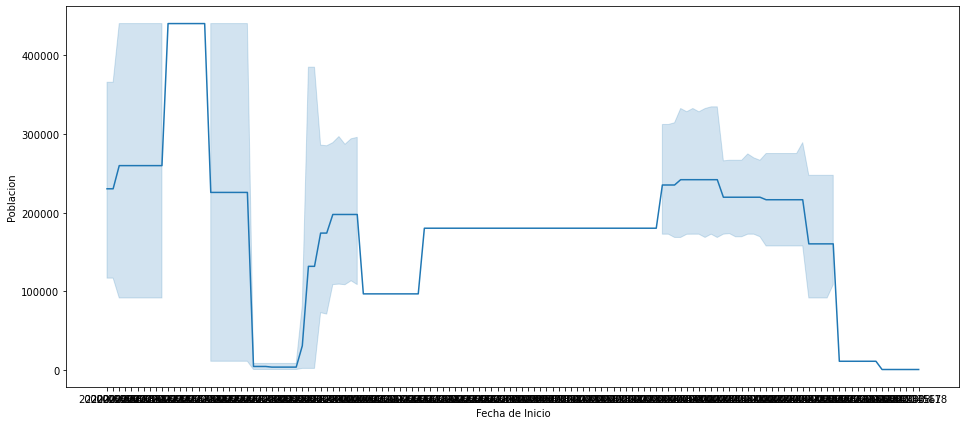

In [62]:
#grafico poblacion en cuarentena en x fecha, no puedo diferenciar las fechas :c
plt.figure(figsize=(16,7))
sns.lineplot(x="Fecha de Inicio", y="Poblacion", data=Regiones_Agrupadas)
